Dans cette partie, nous allons faire une analyse descriptive des données 

In [39]:
# Charger les packages 
import pandas as pd
import os


In [40]:
# Afficher le répertoire de travail actuel
print(os.getcwd())

/home/onyxia/work/Deforestation/MainPython


On peut donc maintenant fusionner toutes nos données en un seule tableau bien formater, le merge se fait sur l'année et le code pays car les trois bases de données n'utilisent pas les mêmes conventions pour les noms de pays 

In [41]:
# Importer les données obtenues précédement
data_BM = pd.read_csv('/home/onyxia/work/Deforestation/Données/data_BM.csv')
data_FAO_pivot = pd.read_csv('/home/onyxia/work/Deforestation/Données/CSV_FAO/data_FAO_pivot.csv', sep=";")
data_owid = pd.read_csv('/home/onyxia/work/Deforestation/Données/df_owid.csv')


# On merge les données de la FAO et de la Banque Mondiale
data_1 = pd.merge(data_BM, data_FAO_pivot, left_on=['code_pays', 'date'], right_on=['code_pays', 'Year'], how='inner')

# On merge les données ainsi obtenues avec les données de Our World In Data
data = pd.merge(data_1, data_owid, left_on=['code_pays', 'date'], right_on=['code_pays', 'year'] )

# On supprime les colonnes inutiles et on remet la colonne 'country' et 'year' en première position
data = data.drop(columns= ['country_x','country_y','date','year'] )
data = data.rename(columns={'Area' : 'country'})
columns = ['country','Year'] + [col for col in data if (col != 'Year' and col != 'country')]
data = data[columns]

data

,country,Year,PIB,GINI,Part terres agricoles,Part terres foret,code_pays,Export quantity - Fibreboard,Export quantity - Industrial roundwood,Export quantity - Paper and paperboard,...,"Production - Wood chips, particles and residues",Production - Wood fuel,"Production - Wood pellets, briquettes and other agglomerates",commodity_driven_deforestation,forestry,shifting_agriculture,unknown,urbanization,wildfire,total
0,Afghanistan,2001,2.813572e+09,0.0,57.947350,1.852782,AFG,0.0,2038.0,112.00,...,0.0,1314150.0,0.0,0.000000,31.753510,0.000000,56.339203,0.000000,0.000000,88.092710
1,Albania,2001,3.922101e+09,0.0,41.569343,28.123248,ALB,1226.0,25000.0,1094.00,...,0.0,186600.0,0.0,0.000000,2205.439700,73.184525,48.615932,0.000000,1401.781000,3729.021000
2,Algeria,2001,5.941340e+10,0.0,16.840209,0.677194,DZA,0.0,0.0,0.00,...,0.0,7188295.0,0.0,198.382280,499.730440,1559.410400,129.407500,336.517360,745.312300,3468.760300
3,Andorra,2001,1.548266e+09,0.0,48.404255,34.042553,AND,0.0,72.0,17.00,...,0.0,0.0,0.0,0.000000,0.057020,0.000000,0.969052,0.000000,0.628141,1.654213
4,Angola,2001,8.936079e+09,0.0,35.626053,61.886219,AGO,0.0,1300.0,82.00,...,0.0,3240601.0,0.0,2.512755,265.225340,98079.340000,2412.978000,0.000000,460.560180,101220.620000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3508,Uzbekistan,2023,1.015918e+11,0.0,0.000000,0.000000,UZB,8212.0,0.0,14916.00,...,36.0,11428.0,0.0,0.000000,0.000000,0.175452,0.338339,0.000000,0.000000,0.513791
3509,Vanuatu,2023,1.126313e+09,0.0,0.000000,0.000000,VUT,228.0,1662.0,203.00,...,0.0,91000.0,0.0,16.347303,6.635110,806.230350,10.421369,0.000000,0.000000,839.634160
3510,Viet Nam,2023,4.297170e+11,0.0,0.000000,0.000000,VNM,200547.0,18610.0,2067361.00,...,18450000.0,20000000.0,4740000.0,33523.220000,67764.450000,33846.140000,22.841860,158.947620,0.000000,135315.610000
3511,Zambia,2023,2.757796e+10,0.0,0.000000,0.000000,ZMB,110.0,25740.0,350.99,...,201000.0,23033000.0,46000.0,2.005270,0.684082,190196.110000,38.219566,151.211750,28.354399,190416.580000


In [42]:
column_names = data.columns.tolist()
print(column_names)


['country', 'Year', 'PIB', 'GINI', 'Part terres agricoles', 'Part terres foret', 'code_pays', 'Export quantity - Fibreboard', 'Export quantity - Industrial roundwood', 'Export quantity - Paper and paperboard', 'Export quantity - Roundwood', 'Export quantity - Wood chips, particles and residues', 'Export quantity - Wood fuel', 'Export quantity - Wood pellets, briquettes and other agglomerates', 'Export value - Fibreboard', 'Export value - Industrial roundwood', 'Export value - Paper and paperboard', 'Export value - Roundwood', 'Export value - Wood chips, particles and residues', 'Export value - Wood fuel', 'Export value - Wood pellets, briquettes and other agglomerates', 'Import quantity - Fibreboard', 'Import quantity - Industrial roundwood', 'Import quantity - Paper and paperboard', 'Import quantity - Roundwood', 'Import quantity - Wood chips, particles and residues', 'Import quantity - Wood fuel', 'Import quantity - Wood pellets, briquettes and other agglomerates', 'Import value - Fi

In [43]:
# création de la variable du total de production de bois et changement du nom de la variable 'total' (qui correspond à la surface total déforester) pour éviter les confusions

data['Total_Production'] = data.filter(like='Production').sum(axis=1)
data = data.rename(columns={'total' : 'Total_deforestation(ha)'})
data

,country,Year,PIB,GINI,Part terres agricoles,Part terres foret,code_pays,Export quantity - Fibreboard,Export quantity - Industrial roundwood,Export quantity - Paper and paperboard,...,Production - Wood fuel,"Production - Wood pellets, briquettes and other agglomerates",commodity_driven_deforestation,forestry,shifting_agriculture,unknown,urbanization,wildfire,Total_deforestation(ha),Total_Production
0,Afghanistan,2001,2.813572e+09,0.0,57.947350,1.852782,AFG,0.0,2038.0,112.00,...,1314150.0,0.0,0.000000,31.753510,0.000000,56.339203,0.000000,0.000000,88.092710,6148300.0
1,Albania,2001,3.922101e+09,0.0,41.569343,28.123248,ALB,1226.0,25000.0,1094.00,...,186600.0,0.0,0.000000,2205.439700,73.184525,48.615932,0.000000,1401.781000,3729.021000,532000.0
2,Algeria,2001,5.941340e+10,0.0,16.840209,0.677194,DZA,0.0,0.0,0.00,...,7188295.0,0.0,198.382280,499.730440,1559.410400,129.407500,336.517360,745.312300,3468.760300,14854490.0
3,Andorra,2001,1.548266e+09,0.0,48.404255,34.042553,AND,0.0,72.0,17.00,...,0.0,0.0,0.000000,0.057020,0.000000,0.969052,0.000000,0.628141,1.654213,0.0
4,Angola,2001,8.936079e+09,0.0,35.626053,61.886219,AGO,0.0,1300.0,82.00,...,3240601.0,0.0,2.512755,265.225340,98079.340000,2412.978000,0.000000,460.560180,101220.620000,8673002.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3508,Uzbekistan,2023,1.015918e+11,0.0,0.000000,0.000000,UZB,8212.0,0.0,14916.00,...,11428.0,0.0,0.000000,0.000000,0.175452,0.338339,0.000000,0.000000,0.513791,184687.0
3509,Vanuatu,2023,1.126313e+09,0.0,0.000000,0.000000,VUT,228.0,1662.0,203.00,...,91000.0,0.0,16.347303,6.635110,806.230350,10.421369,0.000000,0.000000,839.634160,258000.0
3510,Viet Nam,2023,4.297170e+11,0.0,0.000000,0.000000,VNM,200547.0,18610.0,2067361.00,...,20000000.0,4740000.0,33523.220000,67764.450000,33846.140000,22.841860,158.947620,0.000000,135315.610000,156829940.0
3511,Zambia,2023,2.757796e+10,0.0,0.000000,0.000000,ZMB,110.0,25740.0,350.99,...,23033000.0,46000.0,2.005270,0.684082,190196.110000,38.219566,151.211750,28.354399,190416.580000,51698000.0


Création de la variable de croissance du PIB

In [44]:
# Trier les données par Pays et Année
data = data.sort_values(by=['country', 'Year']).reset_index(drop=True)
data
# Calcul de la croissance du PIB par pays
data['Croissance_PIB'] = data.groupby('code_pays')['PIB'].pct_change() * 100
data

,country,Year,PIB,GINI,Part terres agricoles,Part terres foret,code_pays,Export quantity - Fibreboard,Export quantity - Industrial roundwood,Export quantity - Paper and paperboard,...,"Production - Wood pellets, briquettes and other agglomerates",commodity_driven_deforestation,forestry,shifting_agriculture,unknown,urbanization,wildfire,Total_deforestation(ha),Total_Production,Croissance_PIB
0,Afghanistan,2001,2.813572e+09,0.0,57.947350,1.852782,AFG,0.0,2038.0,112.0,...,0.0,0.000000,31.75351,0.0000,56.339203,0.000000,0.000000,88.09271,6148300.0,NaN
1,Afghanistan,2002,3.825701e+09,0.0,57.939684,1.852782,AFG,0.0,10000.0,22.0,...,0.0,0.000000,67.85075,0.0000,110.789610,0.000000,0.000000,178.64037,6221252.0,35.973125
2,Afghanistan,2003,4.520947e+09,0.0,58.083805,1.852782,AFG,396.0,34074.0,161.0,...,0.0,0.000000,113.22104,0.0000,131.115220,0.000000,0.000000,244.33626,6296352.0,18.173017
3,Afghanistan,2004,5.224897e+09,0.0,58.151266,1.852782,AFG,396.0,99987.0,198.0,...,0.0,0.000000,131.22055,0.0000,70.224400,0.000000,0.000000,201.44495,6373664.0,15.570851
4,Afghanistan,2005,6.203257e+09,0.0,58.134400,1.852782,AFG,396.0,99987.0,198.0,...,0.0,0.000000,102.62120,0.0000,133.335630,0.000000,0.000000,235.95683,6453258.0,18.724960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3508,Zimbabwe,2019,2.571741e+10,50.3,39.518358,45.213002,ZWE,12338.0,40656.0,5134.0,...,0.0,1.382205,6526.89840,4999.3896,12.587267,1.833442,11.238701,11553.33000,19966700.0,-24.706180
3509,Zimbabwe,2020,2.686794e+10,0.0,39.754073,45.093912,ZWE,10729.0,24000.0,1272.0,...,0.0,1.017816,2693.83150,3496.3782,17.037254,2.787108,13.867128,6224.91900,20094248.0,4.473727
3510,Zimbabwe,2021,2.724052e+10,0.0,39.385906,44.974822,ZWE,9737.7,28406.0,4495.4,...,0.0,1.600864,2937.02470,6014.7360,68.924420,3.738736,28.462732,9054.48700,20511446.0,1.386704
3511,Zimbabwe,2022,3.278975e+10,0.0,39.489284,44.855732,ZWE,5995.0,20376.0,4223.0,...,0.0,4.023651,3659.49980,4522.8800,45.421550,3.960732,29.195229,8264.98000,20291543.0,20.371262


Un exemple avec les données de la Chine

In [45]:
data[data["code_pays"]=="CHN"]

,country,Year,PIB,GINI,Part terres agricoles,Part terres foret,code_pays,Export quantity - Fibreboard,Export quantity - Industrial roundwood,Export quantity - Paper and paperboard,...,"Production - Wood pellets, briquettes and other agglomerates",commodity_driven_deforestation,forestry,shifting_agriculture,unknown,urbanization,wildfire,Total_deforestation(ha),Total_Production,Croissance_PIB
738,China,2001,1.339401e+12,0.0,55.757872,19.104968,CHN,203304.00,27910.0,3196003.00,...,0.0,131.878740,188212.33,823.4999,7407.07760,1099.44130,32614.8890,230289.11,689580447.0,NaN
739,China,2002,1.470558e+12,42.0,55.821132,19.356454,CHN,388552.00,453466.0,3180839.00,...,0.0,39.068985,210108.97,1202.3387,6336.21340,1233.66100,30230.7030,249150.95,690873014.0,9.792196
740,China,2003,1.660281e+12,0.0,55.884389,19.607939,CHN,330232.00,19492.0,3567493.00,...,0.0,366.639740,186957.81,925.9517,3863.88700,927.33685,68719.8700,261761.50,715231136.0,12.901425
741,China,2004,1.955347e+12,0.0,55.947645,19.859423,CHN,466813.00,31228.0,3396218.00,...,0.0,252.165420,394846.44,1322.2778,6537.34860,2196.08180,96389.4900,501543.80,728562372.0,17.772070
742,China,2005,2.285961e+12,40.9,56.010903,20.110908,CHN,1706868.00,29259.0,3857174.00,...,0.0,299.226870,335931.72,1233.3147,4941.71880,1711.70900,39472.6600,383590.34,723297368.0,16.908222
743,China,2006,2.752119e+12,0.0,56.074160,20.362393,CHN,2320140.00,138231.0,4843833.00,...,0.0,450.864720,460428.56,2044.7043,6203.06300,2505.66400,103600.0200,575232.90,730860282.0,20.392189
744,China,2007,3.550328e+12,0.0,56.137418,20.613878,CHN,2055790.00,173207.0,5931715.00,...,0.0,405.053860,600354.10,2799.9065,6638.03760,3318.90750,39462.6680,652978.70,756300990.0,29.003442
745,China,2008,4.594337e+12,43.0,56.200672,20.865362,CHN,2781540.00,98979.0,4872327.00,...,0.0,504.363100,682823.60,2293.5690,6256.32670,3260.34200,42893.0500,738031.30,833746332.0,29.405988
746,China,2009,5.101691e+12,0.0,56.263925,21.116845,CHN,2215501.00,47394.0,4898997.00,...,0.0,732.101440,553008.44,2598.4326,5465.53760,3084.11080,34714.6130,599603.25,899274022.0,11.043038
747,China,2010,6.087192e+12,43.7,56.183473,21.368329,CHN,2330277.00,49330.0,4881489.00,...,0.0,337.067800,571005.00,3141.5098,5897.02250,3499.96900,43945.3400,627825.90,949044104.0,19.317136


## Analyse Descriptive

On va d'abord essayer de visualiser les liens entre la croissance du PIB, la production de bois et la surface déforester 

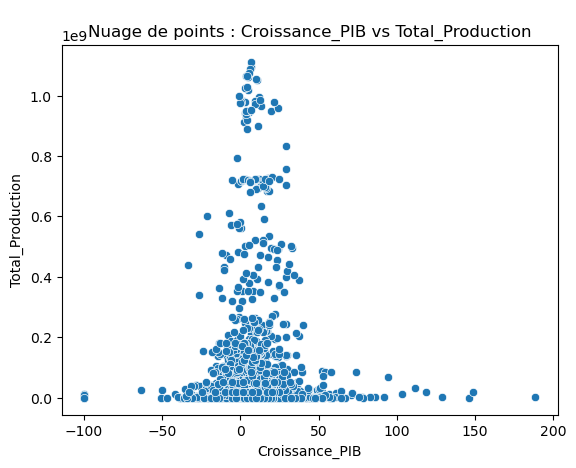

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer le nuage de points avec seaborn
sns.scatterplot(x='Croissance_PIB', y='Total_Production', data=data)

# Ajouter un titre
plt.title('Nuage de points : Croissance_PIB vs Total_Production')

# Afficher le graphique
plt.show()


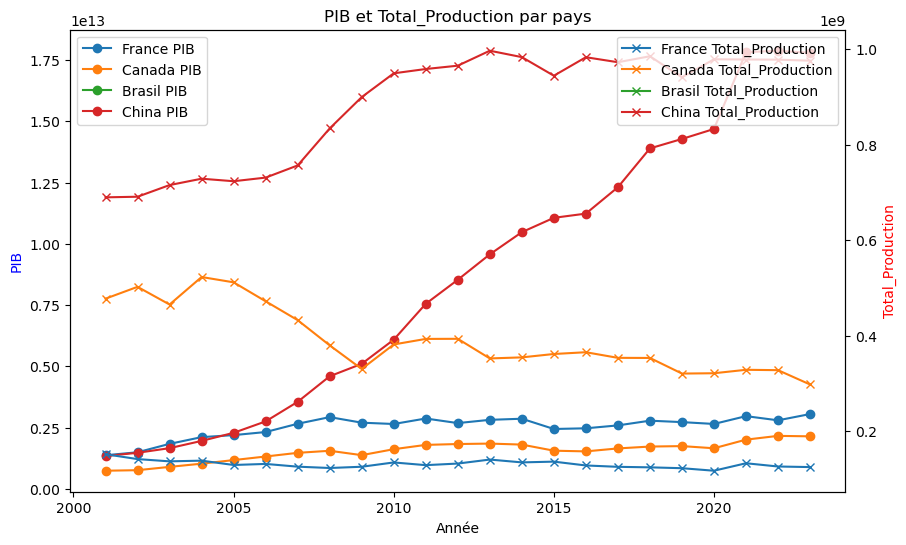

In [47]:
import matplotlib.pyplot as plt

# Liste des pays à afficher
pays_a_afficher = ['France', 'Canada', 'Brasil', 'China']

# Filtrer le DataFrame pour ne garder que les lignes correspondant à ces pays
filtered_data = data[data['country'].isin(pays_a_afficher)]

# Créer une figure et des axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Tracer les lignes pour chaque pays (PIB sur le premier axe)
for pays in pays_a_afficher:
    # Filtrer les données pour chaque pays
    pays_data = filtered_data[filtered_data['country'] == pays]
    
    # Tracer la ligne pour PIB sur l'axe de gauche
    ax1.plot(pays_data['Year'], pays_data['PIB'], label=f'{pays} PIB', marker='o')

# Créer un deuxième axe des ordonnées pour Total_Production (axe de droite)
ax2 = ax1.twinx()

# Tracer les lignes pour Total_Production sur l'axe de droite
for pays in pays_a_afficher:
    # Filtrer les données pour chaque pays
    pays_data = filtered_data[filtered_data['country'] == pays]
    
    # Tracer la ligne pour Total_Production sur l'axe de droite
    ax2.plot(pays_data['Year'], pays_data['Total_Production'], label=f'{pays} Total_Production', marker='x')

# Ajouter des titres et des labels
ax1.set_title('PIB et Total_Production par pays')
ax1.set_xlabel('Année')
ax1.set_ylabel('PIB', color='blue')  # Axe gauche pour PIB
ax2.set_ylabel('Total_Production', color='red')  # Axe droite pour Total_Production

# Ajouter des légendes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Afficher le graphique
plt.show()



In [48]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


Mise en place d'une fonction permettant de créer une carte interactive sur plusieurs années

In [49]:
import plotly.express as px
import pandas as pd

def carte_period(df,name): 
    # Étape 1 : Ajouter toutes les années manquantes (2001-2023) pour chaque pays
    all_years = list(range(2001, 2024))  # Inclut 2001-2023
    all_countries = df['country'].unique()

    # Créer toutes les combinaisons possibles de pays et années
    all_combinations = pd.MultiIndex.from_product([all_countries, all_years], names=["country", "Year"])
    df = df.set_index(["country", "Year"]).reindex(all_combinations).reset_index()


    # Étape 2 : Fixer l'échelle de couleurs pour toutes les années
    value_min = df[name].min()  # Valeur minimale globale
    value_max = df[name].max()  # Valeur maximale globale

    # Étape 3 : Créer la carte interactive
    fig = px.choropleth(
        df,
        locations="country",
        locationmode="country names",
        color=name,
        animation_frame="Year",
        color_continuous_scale="Cividis",
        #range_color=[value_min, value_max],  # Fixer l'échelle de couleurs
        title="Carte interactive de "+name+" par année (2001-2023)"
    )

    # Ajuster la mise en page
    fig.update_layout(
        width=1200,  # Largeur de la carte
        height=600,  # Hauteur de la carte
        title_x=0.5,  # Centrer le titre
        geo=dict(
            showframe=False,  # Supprimer le cadre
            showcoastlines=True,  # Afficher les côtes
            projection_type='natural earth'  # Type de projection
        )
    )

    # Afficher la carte interactive
    fig.show()

On peut visualiser le volume de production total de bois par pays et par année entre 2001 et 2023

In [50]:
carte_period(data,'Total_Production')

On peut observer de grande disparité de production de bois (en volume) entre les différents pays du monde, mais les tendances globales se conservent sur la périodes temporelles étudiée. Ainsi on peut observer qui sont les plus grands producteurs de bois, dans l'ordre décroissants : les Etats-Unies, la Chine, l'Inde, le Brésil et la Russie.

On peut aussi visualiser la surface déforestée par pays et par années

In [51]:
carte_period(data,'Total_deforestation(ha)')

Contrairement à a production de bois par pays, la surface déforesté est beaucoup plus volatile, elle peut, pour un même pays, grandement varier d'une année à l'autre comme on peut l'observer pour le Brésil entre 2015 et 2016. e plus ce ne sont pas forcément les pays qui déforestent le plus qui ont la plus grande production de bois.

Et pour finir, on peut visualiser notre troisième variable d'intérêt, la croissance du PIB (Les 0 obtenues pour la première année sont un artifice de calcul de la croissance du PIB)

In [52]:
carte_period(data,'Croissance_PIB')

Comme on pouvait s'y attendre la croissance du PIB varient beaucoup en fonction des pays et peut varier en fonction des pays car elle est affecter par les crises économiques comme le Covid et la crise de 2008.

On peut ensuite créer un programme permettant d'afficher une carte interactive des quantités précédentes moyenné sur la période temporelle, nous donnant ainsi une idée du comportement global des pays depuis 2001

In [57]:
def carte_moyenne(df,name):

    # Calculer la moyenne des valeurs par pays
    average_data = df.groupby('country', as_index=False)[name].mean()
    average_data.rename(columns={name: 'Moyenne '+name}, inplace=True)

    # Créer la carte
    fig = px.choropleth(
        average_data,
        locations="country",           # Colonne des noms des pays
        locationmode="country names",  # Mode basé sur les noms de pays
        color='Moyenne '+name,         # Colonne des valeurs moyennes
        title="Valeur moyenne de "+name+" par pays",
        color_continuous_scale="Plasma"  # Palette de couleurs
    )

    # Ajuster la mise en page
    fig.update_layout(
        width=1200,  # Largeur de la carte
        height=600,  # Hauteur de la carte
        title_x=0.5,  # Centrer le titre
        geo=dict(
            showframe=False,  # Supprimer le cadre
            showcoastlines=True,  # Afficher les côtes
            projection_type='natural earth'  # Type de projection
        )
    )

    # Afficher la carte
    fig.show()

carte_moyenne(data,'Total_Production')
carte_moyenne(data,'Total_deforestation(ha)')
carte_moyenne(data,'Croissance_PIB')

Ces trois cartes nous permettent seulement d'avoir un comportement moyenné des quantités étudiés mais cela nous permet de bien nous rendre compte des principaux producteurs de bois mais aussi d'avoir une distinction plus nette entre les pays en voie de développement et les pays développés.

Pour avoir une meilleur idée des liens entre nos variables, on peut aussi faire un programme nous permettant d'observer qualitativement les corrélations entre les moyennes de deux colonnes de notre dataframe, nous permettant ainsi d'avoir une idée des résultats attendues pour les régressions linéaires.

In [54]:
import plotly.express as px

def nuage_inter(data,xval,yval):
    # Calculer la moyenne des deux colonnes par pays
    average_data = data.groupby('country', as_index=False)[[xval, yval]].mean()

    # Créer le nuage de points 2D sans gradient de couleur
    scatter = px.scatter(
        average_data,
        x=xval,        # Moyenne de 'value' pour l'axe X
        y=yval,       # Moyenne de 'value2' pour l'axe Y
        hover_name="country",  # Afficher le nom du pays en hover
        title= xval+" vs moyenne de "+yval+" (moyenne de 2001 à 2023)"
    )

    # Mettre l'axe y en échelle logarithmique
    scatter.update_layout(
        xaxis=dict(
            type='log',  # Échelle logarithmique pour l'axe y
            title='Moyenne de '+xval+' (échelle log)'  # Titre de l'axe y
        ),
        title=dict(
        x=0.5,  # Centrer le titre horizontalement
        xanchor='center'  # Ancrage du titre au centre
        ),
        yaxis=dict(
            type='log',  # Échelle logarithmique pour l'axe y
            title='Moyenne de '+yval+' (échelle log)'  # Titre de l'axe y
        ),
    )

    # Mettre à jour la présentation des points (couleur unie)
    scatter.update_traces(marker=dict(size=10, color='blue'))  # Utiliser une couleur unie

    # Affichage du graphique
    scatter.show()




In [55]:
nuage_inter(data,'Total_Production','Total_deforestation(ha)')

Ce nuage de point est très intéressant car au premier ordre, on se rend compte qu'il y a une relation linéaire empirique qui émerge en échelle log log, ainsi lors de l'étude quantitative il sera judicieux de regarder le logarithme de ces quantités et aussi leurs moyennes.

In [56]:
nuage_inter(data,'Total_Production','Croissance_PIB')
nuage_inter(data,'Total_deforestation(ha)','Croissance_PIB')

Ces deux graphes nous font constater que la surface déforesté et la production volumique de bois n'ont pas l'air d'être des variables très explicatives du PIB.